# Самостоятельная работа 05.12.2020

## numpy

### Задача 0.1

Напишите следующую функцию:

На вход функции приходит матрица из булевых значения (`True` / `False`). Верните `True`, если в каждом столбце есть хотя бы одна `True`.

In [32]:
import numpy as np
def columnwise_any_then_all(matrix):
    return np.all(np.any(matrix, axis=1))

In [33]:
assert True == columnwise_any_then_all([[True, False, False],[False, False, True],[False, True, False]])

### Задача 0.2

Напишите функцию, которая вернет индекс первого элемента, который больше нуля. Предполагайте, что положительный элемент всегда существует.

In [34]:
def where_the_first_positive(array):
    i, j = np.where(array > 0)
    return i[0], j[0]

In [36]:
assert (1, 2) == where_the_first_positive(np.array([[0, 0, 0],[-1, 0, 2],[1, 3, 4]]))

### Задача 0.3
На вход функции приходит np.array в котором лежат целые числа. Число означает изменение температуры в этот день по сравнению со вчерашним днем. Верните количество дней, когда температура была больше `target`.
Стартовая температура равна 10 градусам.

In [97]:
def warming(temperature_deltas, target):
    return len(np.where(np.cumsum(np.concatenate([[10],temperature_deltas])) > target)[0]) - 1

In [98]:
assert 5 ==  warming(np.array([-1, -10, 20, 3, -4, -10, -1, -2, 5]), 8)

## pandas

В этой секции будем работать с датасетом, где представлена информация о держателях банковских карт. 

В данной секции нельзя глазами отсмотреть весь датасет и напечатать ответ на вопрос. Решения задач должны работать с любой подвыборкой и оставаться корректными.

In [65]:
import pandas as pd
from matplotlib import pyplot as plt

In [66]:
df = pd.read_csv('credit_card_users.csv')

### Задача 1.0
Выведете первые 10 строчек в датасете.

In [70]:
df.loc[:9]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


### Задача 1.1

Напиишите код, который поместит в переменную `ans` список из уникальных типов карт, которые представлены в датасете? Колонка: `Card_Category`


In [72]:
ans = list(df['Card_Category'].unique())

### Задача 1.2

Какие максимальные и минимальные лимитные кредиты имеют держатели?
В переменную `max_lim` поместите максимальный лимит, в переменную `min_lim` - минимальный.

In [76]:
max_lim = df['Credit_Limit'].max()
min_lim = df['Credit_Limit'].min()

### Задача 1.3

Какие максимальные и минимальные лимитные кредиты (`Credit_Limit`) имеют держатели с разными премиальных категориях (`Card_Category`)?

Поместите pd.Series с минимальными лимитами в переменную `min_lim`, а максимальные в переменную `max_lim`.

In [95]:
min_lim = df.groupby('Card_Category')['Credit_Limit'].min()
max_lim = df.groupby('Card_Category')['Credit_Limit'].max()

### Задача 1.4
Постройте диаграмму рассеяния, где по оси `x` будет возраст человека, а по `y` его кредитный лимит.

Одной-двумя фразами опишите, как будет изменяться кредитный лимит при изменении возраста.

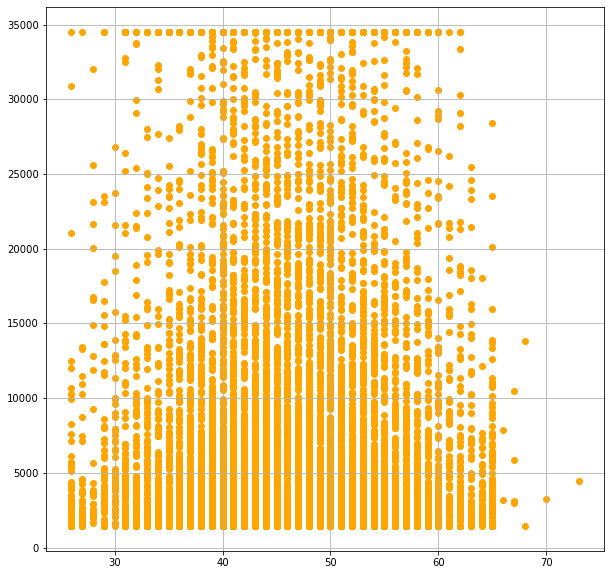

In [102]:
plt.figure(figsize=[10, 10])
plt.scatter(df['Customer_Age'], df['Credit_Limit'], color='orange')
plt.grid(True)

Максимальный кредитный лимит для любого возраста 35000, пользователи в диапазоне возраста от 40 до 50 имеют самое большое сгущение в диапазоне кредитных лимитов от 20000 до 35000 среди других пользователей

### Задача 1.5

Интересно узнать, как связаны уровни образования и кредитный лимит. Нарисуйте график, где по оси `x` уровни образования, а по `y` средний кредитный лимит в группе.

Какой вывод можно сделать? Как связаны уровень образования и лимит?

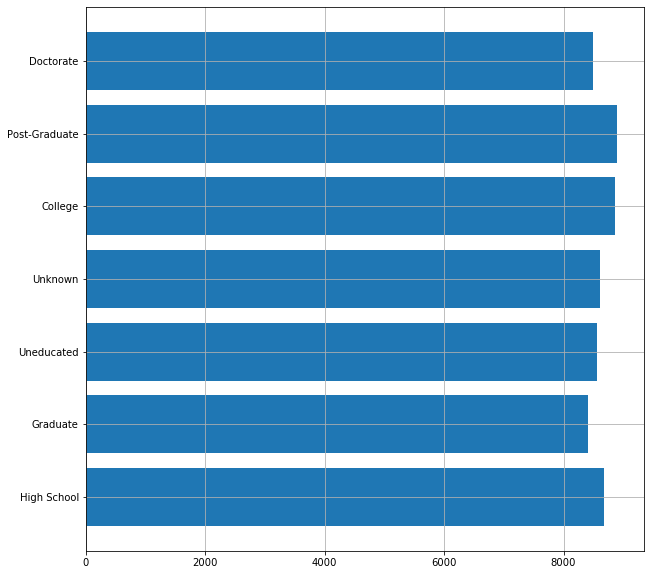

In [109]:
plt.figure(figsize=[10, 10])
plt.barh(df.Education_Level.unique(), df.groupby('Education_Level')['Credit_Limit'].mean())
plt.grid()
plt.show()

В среднем по выборке средний кредитный лимит колеблится в районе 8500, б'ольшие кредитные лимиты имеют группы "Post-Graduate" и "College", меньший же средний кредитный лимит имеет группа "Graduate"

### Задача 1.6


Отношение к кредитам может сильно различаться в зависимости от доходов.

Предварительно почистите выборку от тех, кто вообще не пользуется кредитной картой.
Далее постройте такую величину: среднее использование кредитной карты (`Avg_Utilization_Ratio`) в зависимости от `Income_Category`. Внутри каждой категории доходов необходимо усреднить `Avg_Utilization_Ratio`.


In [117]:
df_ = df[df['Attrition_Flag'] == 'Existing Customer']

Income_Category
$120K +           0.138048
$40K - $60K       0.341997
$60K - $80K       0.224770
$80K - $120K      0.171026
Less than $40K    0.408896
Unknown           0.235052
Name: Avg_Utilization_Ratio, dtype: float64


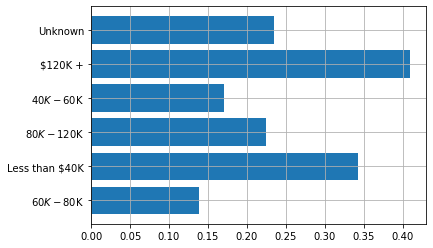

In [124]:
print(df_.groupby('Income_Category')['Avg_Utilization_Ratio'].mean())
plt.barh(df_.Income_Category.unique(), df_.groupby('Income_Category')['Avg_Utilization_Ratio'].mean())
plt.grid(True)
plt.show()